# Varying the set of genes used in regression

This notebook assumes you have run preprocessing and the `--vary-gene` experiment
```sh
make update
make preprocess
python mutrans.py --vary-gene
```

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams["axes.edgecolor"] = "gray"
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["savefig.pad_inches"] = 0.01
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial', 'Avenir', 'DejaVu Sans']
matplotlib.rcParams.update({
    # 'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
})

In [4]:
result = torch.load("results/mutrans.vary_gene.pt")

In [5]:
result.keys()

dict_keys([(), (('exclude', (('gene', '.*'),)),), (('include', (('gene', '^E:'),)),), (('exclude', (('gene', '^E:'),)),), (('include', (('gene', '^M:'),)),), (('exclude', (('gene', '^M:'),)),), (('include', (('gene', '^N:'),)),), (('exclude', (('gene', '^N:'),)),), (('include', (('gene', '^ORF1a:'),)),), (('exclude', (('gene', '^ORF1a:'),)),), (('include', (('gene', '^ORF1b:'),)),), (('exclude', (('gene', '^ORF1b:'),)),), (('include', (('gene', '^ORF3a:'),)),), (('exclude', (('gene', '^ORF3a:'),)),), (('include', (('gene', '^ORF6:'),)),), (('exclude', (('gene', '^ORF6:'),)),), (('include', (('gene', '^ORF7a:'),)),), (('exclude', (('gene', '^ORF7a:'),)),), (('include', (('gene', '^ORF7b:'),)),), (('exclude', (('gene', '^ORF7b:'),)),), (('include', (('gene', '^ORF8:'),)),), (('exclude', (('gene', '^ORF8:'),)),), (('include', (('gene', '^ORF9b:'),)),), (('exclude', (('gene', '^ORF9b:'),)),), (('include', (('gene', '^S:'),)),), (('exclude', (('gene', '^S:'),)),)])

In [6]:
print("\n".join(result[()].keys()))

coef_scale
init_loc_scale
rate_scale
init_scale
loss
|μ|/σ median
|μ|/σ max
ΔlogR(S:D614G) mean
ΔlogR(S:D614G) std
ΔlogR(S:N501Y) mean
ΔlogR(S:N501Y) std
ΔlogR(S:E484K) mean
ΔlogR(S:E484K) std
ΔlogR(S:L452R) mean
ΔlogR(S:L452R) std
R(B.1.1.7)/R(A)
R(B.1.617.2)/R(A)
MAE
RMSE
KL
England KL
England MAE
England RMSE
England B.1.1.7 MAE
England B.1.1.7 RMSE


In [26]:
def plot_metric(metric, descending=False, ylabel=None, filenames=()):
    plt.figure(figsize=(8,4))
    empty = (("exclude", (("gene", ".*"),)),)
    include = {}
    exclude = {}
    for k, v in result.items():
        if k == empty:
            continue
        k = dict(k)
        if "include" in k:
            gene = k["include"][0][1]
            include[gene] = v[metric]
        if "exclude" in k:
            gene = k["exclude"][0][1]
            exclude[gene] = v[metric]
    assert set(include) == set(exclude)
    rankby = [(include[g], g) for g in include]
    rankby.sort(reverse=descending)
    genes = [g for _, g in rankby]
    X = list(range(len(genes)))
    plt.axhline(result[empty][metric], color="darkgreen", linestyle=":", label="No genes",
                zorder=-2)
    plt.plot(X, [include[g] for g in genes], "k.", color="darkred", label="A single gene")
    plt.plot(X, [include[g] for g in genes], "wo", markersize=8, zorder=-1)
    plt.axhline(result[()][metric], color="k", lw=1, linestyle="--", label="All genes",
                zorder=-2)
    plt.legend(loc="best")
    plt.xticks(X, labels=[g[1:-1] for g in genes])
    plt.ylabel(metric if ylabel is None else ylabel)
    plt.xlabel("Gene")
    for f in filenames:
        plt.savefig(f)

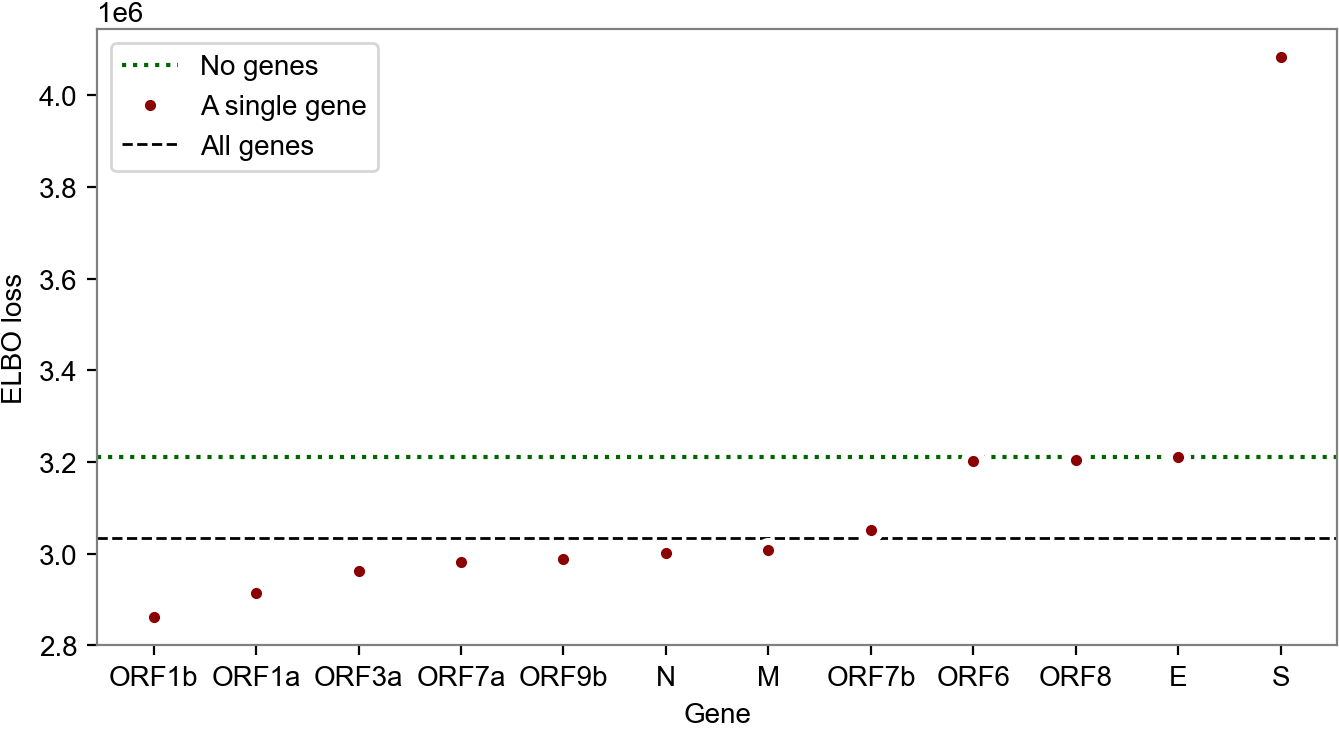

In [27]:
plot_metric("loss", ylabel="ELBO loss",
            filenames=["paper/vary_gene_loss.png"])

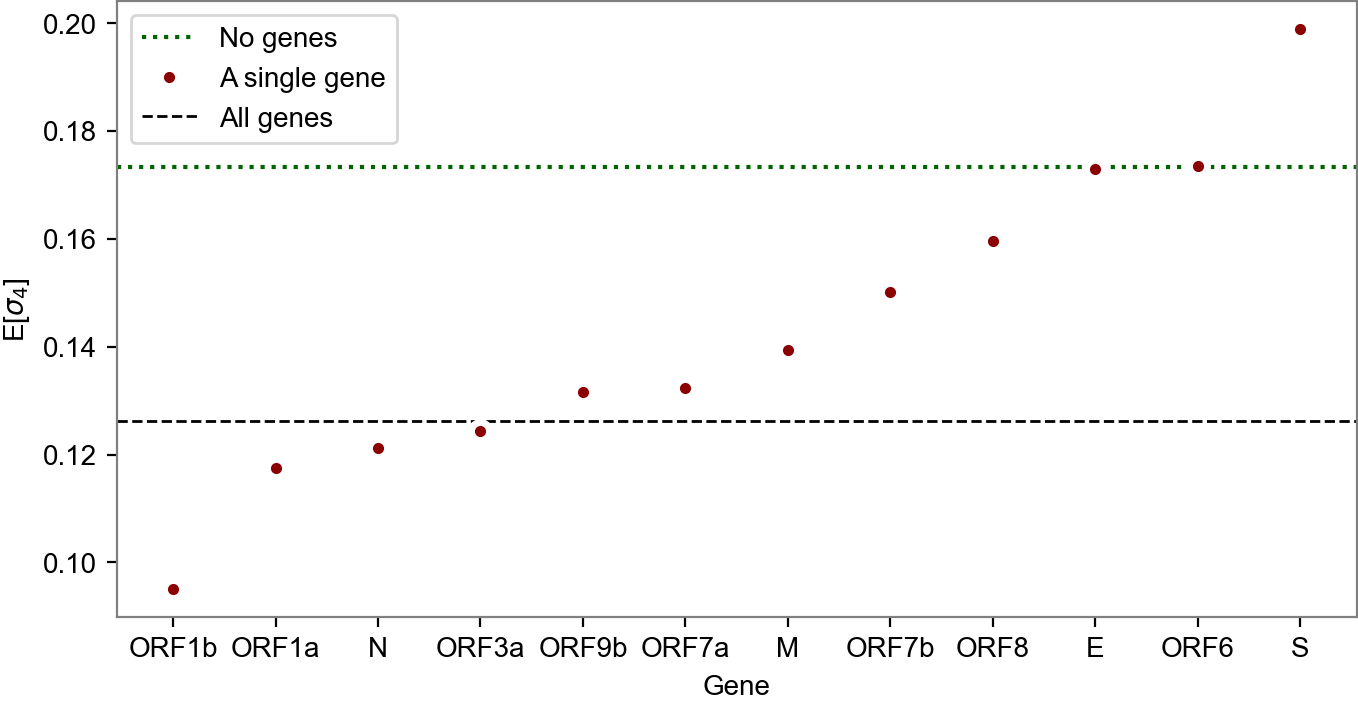

In [28]:
plot_metric("rate_scale", ylabel=r"E[$\sigma_4$]",
            filenames=["paper/vary_gene_loss.png"])

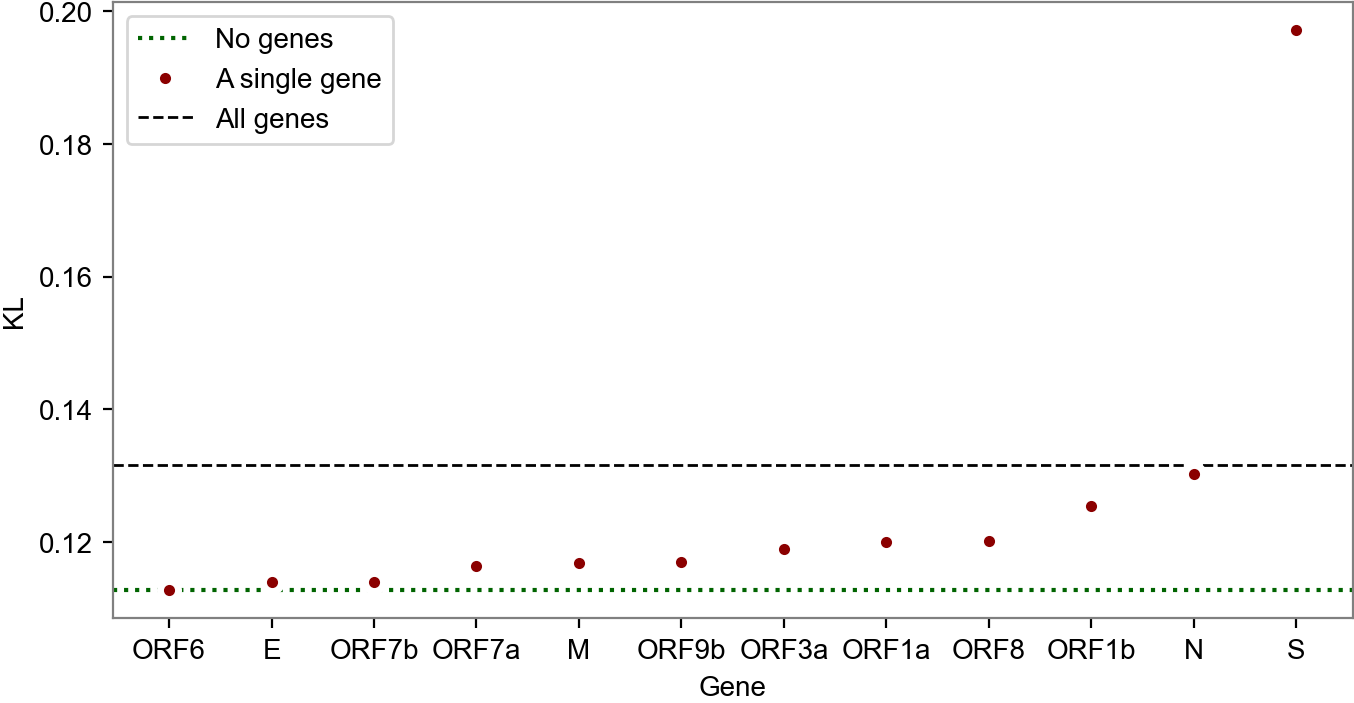

In [29]:
plot_metric("KL")

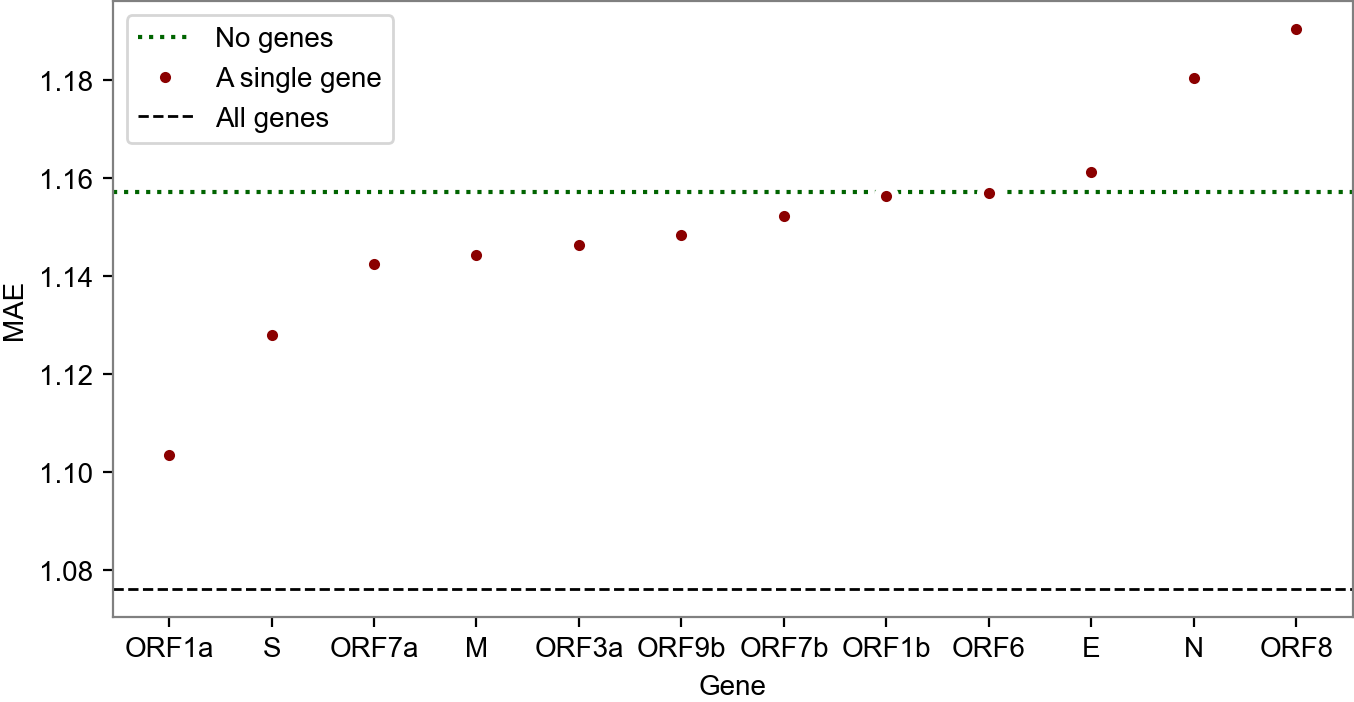

In [30]:
plot_metric("MAE")

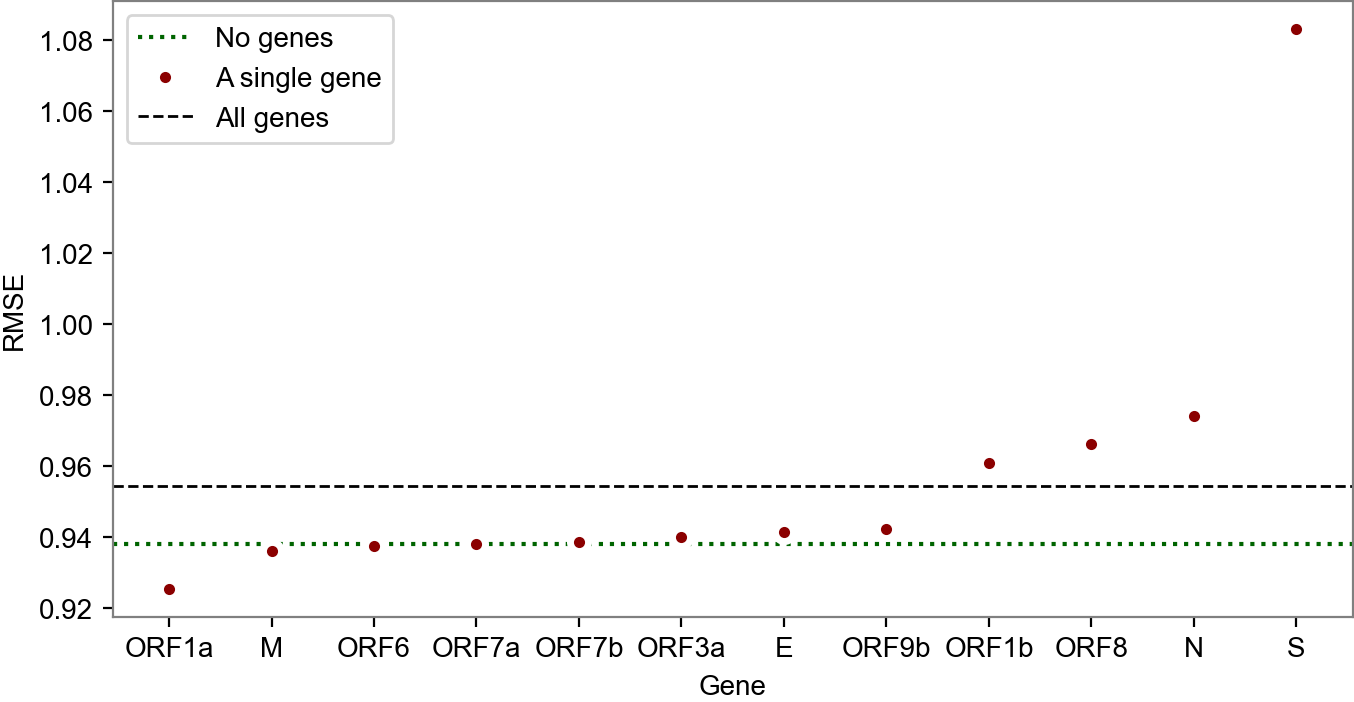

In [31]:
plot_metric("RMSE")

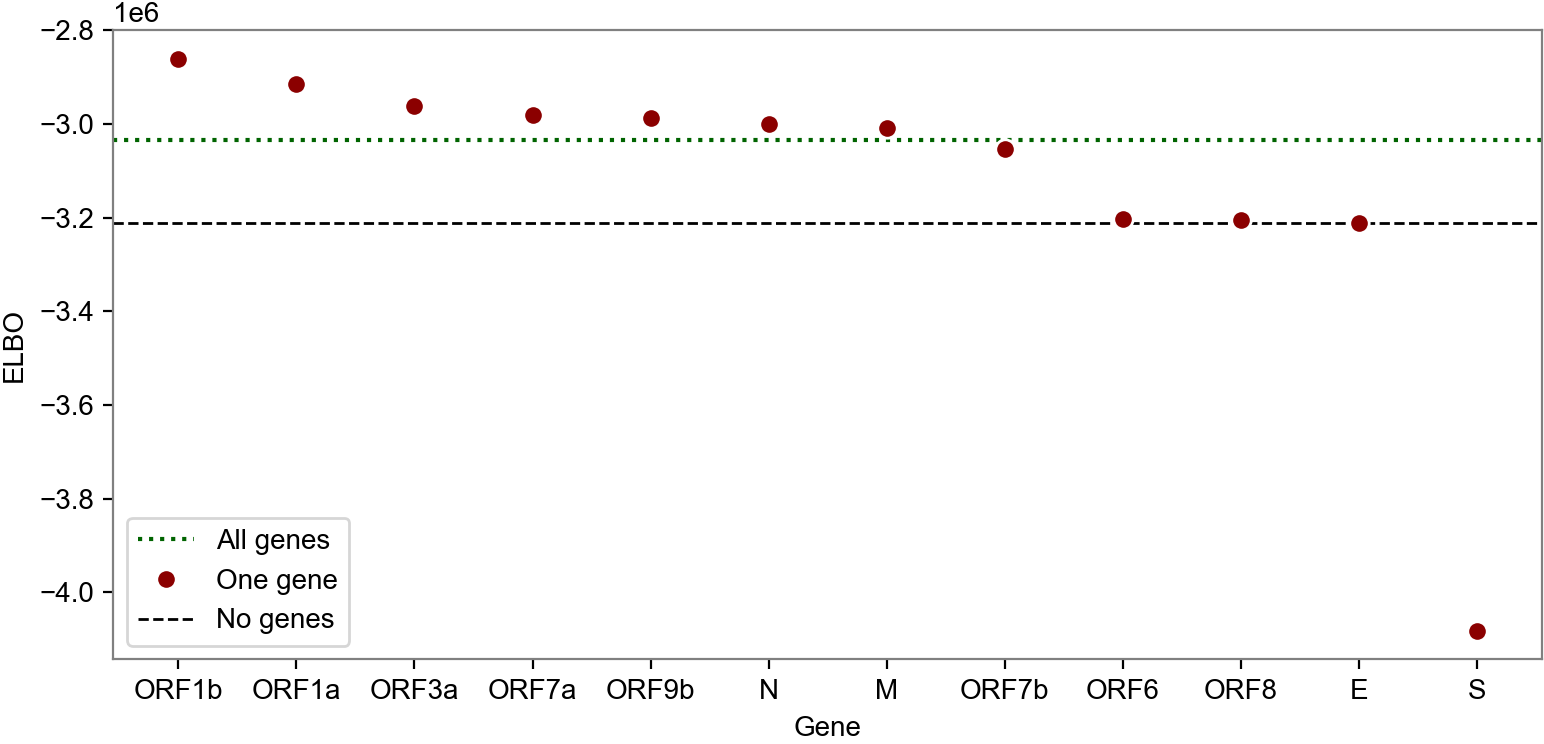

In [34]:
def plot_elbo(descending=True, filenames=()):
    plt.figure(figsize=(8,4))
    empty = (("exclude", (("gene", ".*"),)),)
    include = {}
    exclude = {}
    for k, v in result.items():
        if k == empty:
            continue
        k = dict(k)
        if "include" in k:
            gene = k["include"][0][1]
            include[gene] = -v["loss"]
        if "exclude" in k:
            gene = k["exclude"][0][1]
            exclude[gene] = -v["loss"]
    assert set(include) == set(exclude)
    rankby = [(include[g], g) for g in include]
    rankby.sort(reverse=descending)
    genes = [g for _, g in rankby]
    X = list(range(len(genes)))
    plt.axhline(-result[()]["loss"], color="darkgreen", linestyle=":", label="All genes",
                zorder=-2)
    plt.plot(X, [include[g] for g in genes], "ko", color="darkred", label="One gene",
            markeredgecolor="white", markersize=7)
    plt.axhline(-result[empty]["loss"], color="k", linestyle="--", lw=1, label="No genes",
                zorder=-2)
    plt.legend(loc="best")
    plt.xticks(X, labels=[g[1:-1] for g in genes])
    plt.ylabel("ELBO")
    plt.xlabel("Gene")
    plt.tight_layout()
    for f in filenames:
        plt.savefig(f)
        
plot_elbo(filenames=["paper/vary_gene_elbo.png"])

## --vary-nsp

In [15]:
result = torch.load("results/mutrans.vary_nsp.pt")
result.keys()

FileNotFoundError: [Errno 2] No such file or directory: 'results/mutrans.vary_nsp.pt'

In [16]:
def plot_elbo(descending=True, filenames=()):
    plt.figure(figsize=(8,4))
    empty = (("exclude", (("gene", ".*"),)),)
    full = (("include", (("gene", "^ORF1[ab]:"),)),)
    include = {}
    for k, v in result.items():
        k = dict(k)
        if "include" not in k:
            continue
        k = dict(k["include"])
        if "region" not in k:
            continue
        gene, region = k["region"]
        include[gene, region] = -v["loss"]
    rankby = [(include[gr], gr[-1]) for gr in include]
    rankby.sort(reverse=descending)
    labels = [g for _, g in rankby]
    elbos = [e for e, _ in rankby]
    X = list(range(len(labels)))
    plt.axhline(-result[full]["loss"], color="darkgreen", linestyle=":", label="All of ORF1",
                zorder=-2)
    plt.plot(X, elbos, "ko", color="darkred", label="One nsp",
             markeredgecolor="white", markersize=7)
    plt.axhline(-result[empty]["loss"], color="k", linestyle="--", lw=1, label="No nsps",
                zorder=-2)
    plt.legend(loc="best")
    plt.xticks(X, labels=labels)
    plt.ylabel("ELBO")
    plt.xlabel("Nonstructural protein within ORF1")
    plt.tight_layout()
    for f in filenames:
        plt.savefig(f)
        
plot_elbo(filenames=["paper/vary_nsp_elbo.png"])

KeyError: (('include', (('gene', '^ORF1[ab]:'),)),)

<Figure size 1600x800 with 0 Axes>